In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [76]:
df = pd.read_parquet('datos_para_analisis.parquet')

In [93]:
#Analizamos si hay valores duplicados en el dataframe
if len(df.loc[df.duplicated()]) > 0:
    print(df.loc[df.duplicated()])
else:
    print("No values duplicated", end='\n')

No values duplicated


# Feature Understanding

In [78]:
df.describe()

,Year,Deaths,Tesla_driver,Tesla_occupant,Other_vehicle,Cyclists_Peds,TSLApluscycl_peds,AutoPilot_claimed,Verified_Autopilot_Death
count,254.000000,254.000000,254,254,254,254,254,254,254
unique,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,False,False,False,False,True,False,False
freq,NaN,NaN,155,222,169,219,137,230,241
mean,2019.732283,1.196850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.073544,0.495663,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

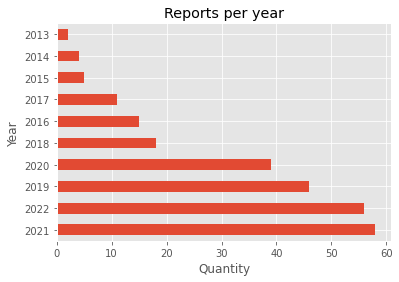

In [79]:
#Reports per year
ax = df.Year.value_counts().plot(kind='barh', title='Reports per year')
ax.set_xlabel('Quantity')
ax.set_ylabel('Year')
plt.show()

We can see that year 2021 is the one that has more reports than the others

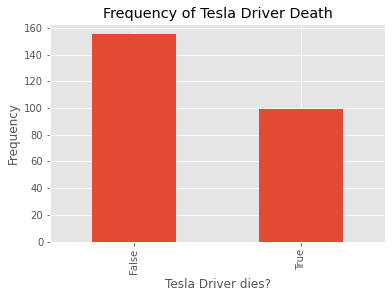

In [80]:
#Tesla Driver
ax = df.Tesla_driver.value_counts().plot(kind='bar', title='Frequency of Tesla Driver Death')
ax.set_xlabel('Tesla Driver dies?')
ax.set_ylabel('Frequency')
plt.show()

We can see that the number of times a Tesla driver dies. Most of the time the Tesla Driver survives the accident

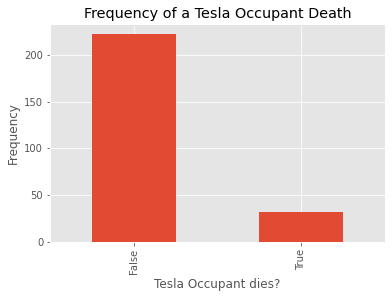

In [81]:
#Tesla Occupant
ax = df.Tesla_occupant.value_counts().plot(kind='bar', title='Frequency of a Tesla Occupant Death')
ax.set_xlabel('Tesla Occupant dies?')
ax.set_ylabel('Frequency')
plt.show()

Most of the time the Tesla Occupant survives the accident. If we compare the barchart above this one we can see that the Tesla Driver dies more than the occupant.

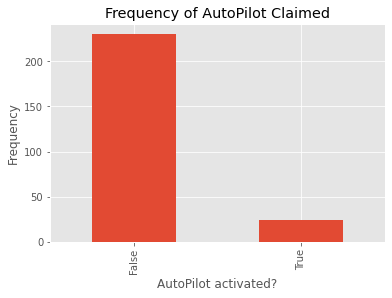

Quantity of car crashes were AutoPilot was Deactivated: 230
Quantity of car crashes were AutoPilot was Activated: 24


In [82]:
#Autopilot claimed to be activated
ax = df.AutoPilot_claimed.value_counts().plot(kind='bar', title='Frequency of AutoPilot Claimed')
ax.set_xlabel('AutoPilot activated?')
ax.set_ylabel('Frequency')
plt.show()
print(f'Quantity of car crashes were AutoPilot was Deactivated: {df.AutoPilot_claimed.value_counts()[0]}', end='\n')
print(f'Quantity of car crashes were AutoPilot was Activated: {df.AutoPilot_claimed.value_counts()[1]}')

We can see on this barchart that most of the time the autopilot was claimed to be deactivated before the crash.

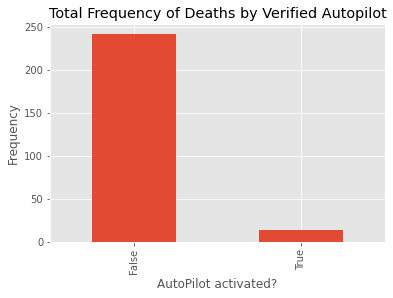

Quantity of car crashes were AutoPilot was Deactivated: 241
Quantity of car crashes were AutoPilot was Activated: 13


In [83]:
#Verified autopilot death
ax = df.Verified_Autopilot_Death.value_counts().plot(kind='bar', title='Total Frequency of Deaths by Verified Autopilot')
ax.set_xlabel('AutoPilot activated?')
ax.set_ylabel('Frequency')
plt.show()
print(f'Quantity of car crashes were AutoPilot was Deactivated: {df.Verified_Autopilot_Death.value_counts()[0]}', end='\n')
print(f'Quantity of car crashes were AutoPilot was Activated: {df.Verified_Autopilot_Death.value_counts()[1]}')

In this barchart we can see that most of the time the car crashes don't have the autopilot activated. Also we can see that some people that have claimed to have it activated actually they don't. So most of the time the autopilot is disable on the accidents.

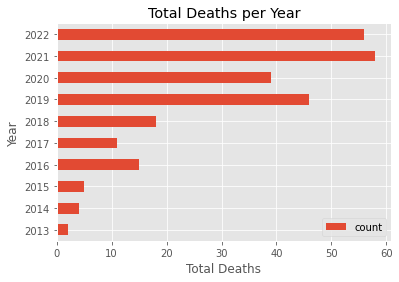

In [84]:
#Deaths per year
ax = df.groupby('Year',sort='ascending')['Deaths'].agg(['count']).plot(kind='barh', title='Total Deaths per Year')
data = df.groupby('Year',sort='ascending')['Deaths'].agg(['count'])
ax.set_xlabel('Total Deaths')
ax.set_ylabel('Year')
plt.show()

The total deaths per year. There are more deaths in 2021 that in 2022.

# Feature Relationships

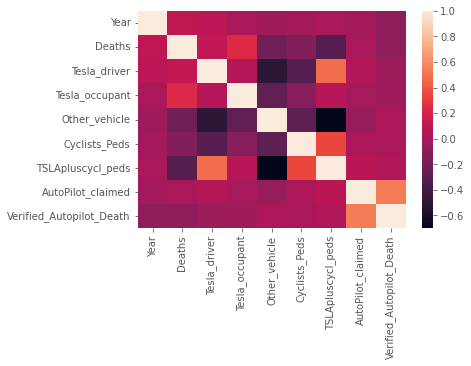

In [85]:
#Correlation between variables
sns.heatmap(df.corr())
plt.show()

On this correlation matrix we can see that there is not so much correlation between the variables.

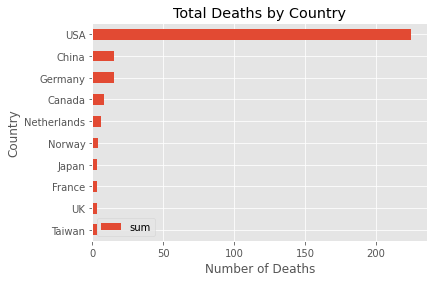

In [86]:
#Top 10 Total deaths by Country
ax = pd.DataFrame(df.groupby('Country')['Deaths'] \
        .agg(['sum'])) \
        .sort_values(by='sum', ascending=True) \
        .tail(10) \
        .plot(kind='barh', title=('Total Deaths by Country'))

ax.set_xlabel('Number of Deaths')
plt.show()

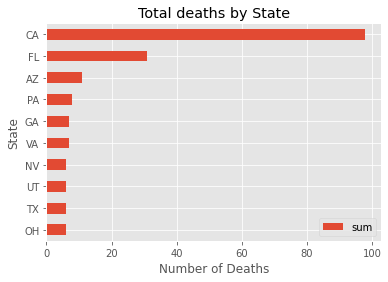

In [87]:
# Top 10 Total Deaths by State
ax = df.query('Country == "USA"') \
        .groupby('State')['Deaths'] \
        .agg(['sum']) \
        .sort_values(by='sum', ascending=True) \
        .tail(10) \
        .plot(kind='barh', title='Total deaths by State')

ax.set_xlabel('Number of Deaths')
plt.show()

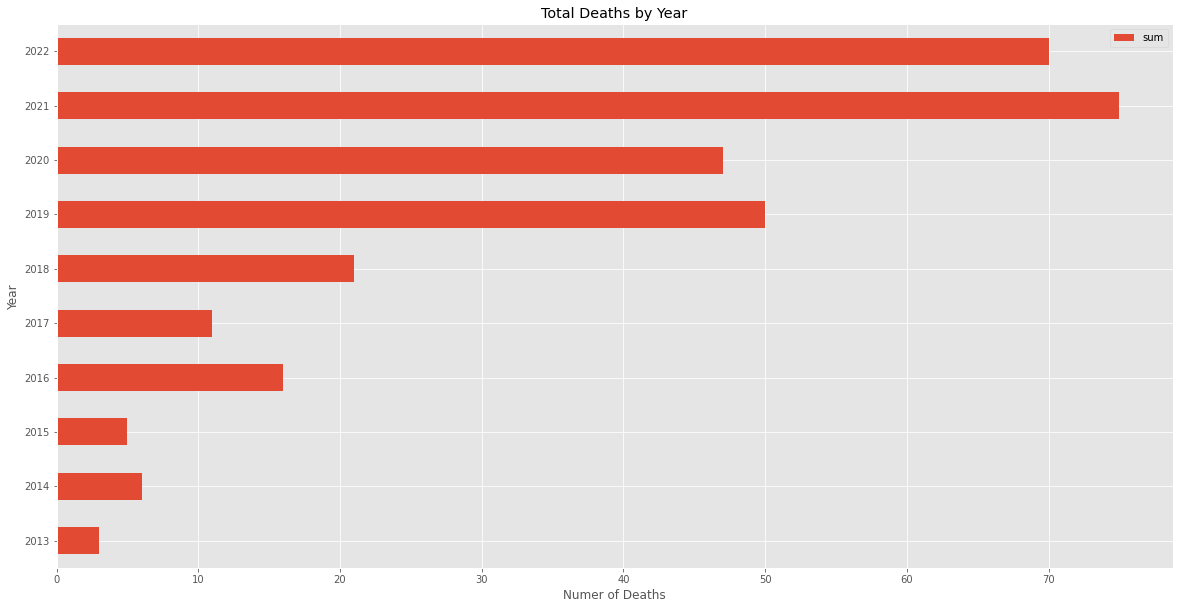

In [88]:
#Total deaths by year

ax = df.groupby('Year')['Deaths'] \
    .agg(['sum']) \
    .plot(kind='barh', title='Total Deaths by Year', figsize=(20,10))

ax.set_xlabel('Numer of Deaths')
plt.show()

# Questions about the data

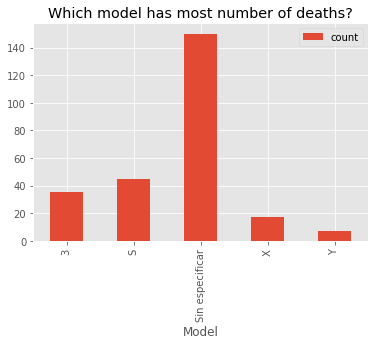

In [89]:
#Which model has most number of deaths?
df.groupby('Model')['Deaths'].agg(['count']).plot(kind='bar', title='Which model has most number of deaths?')
plt.show()

We can see that most of the rpeorts don't have the model type of the vehicle available. If the ommit that, the model that has the most number of deaths is the Model S, followed by Model 3.

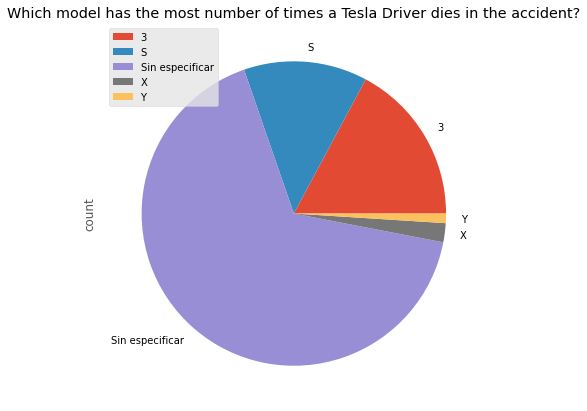

In [90]:
#Which model has the most number of times a Tesla Driver dies in the accident?
df.query('Tesla_driver == True') \
.groupby('Model')['Tesla_driver'] \
.agg(['count']) \
.plot(kind='pie', y='count', title='Which model has the most number of times a Tesla Driver dies in the accident?', figsize=(7,7), fontsize=10)

plt.show()

In model 3, most of the drivers dies.

In [91]:
#Is there any correlation between the autopilot activated and the number of deaths?
df = df.copy()
df['Verified_Autopilot_Death'] = df['Verified_Autopilot_Death'].map({True: 1, False: 0})

In [92]:
correlation = df['Deaths'].corr(df['Verified_Autopilot_Death'])

print(f'The correlation between deaths and autopilot activated is {correlation}')

The correlation between deaths and autopilot activated is -0.09242077379544078


We can see that the correlation between the deaths and the autopilot activated is very low, so the variables are not correlated.